In [1]:
# from pymilvus import connections
# connections.connect(
#   alias="default",
#   user='username',
#   password='password',
#   host='localhost',
#   port='19530'
# )

In [9]:
from pymilvus import utility
utility.has_collection("pengenalan_wajah")

True

In [7]:
from pymilvus import utility

In [12]:
from pymilvus import connections, db
databases = db.list_database()

In [19]:

database_name in databases

True

In [15]:
db_name = 'technos_studio'
collection_name = 'pengenalan_wajah'
user = 'username'
password = 'password'
host = 'localhost'
port = '19530'

if db_name not in databases:
  db.create_database(db_name)

conn = connections.connect(
  alias="default",
  user=user,
  password=password,
  host=host,
  port=port,
  db_name=db_name
)

In [8]:
from pymilvus import connections, db

conn = connections.connect(
  alias="default",
  user='username',
  password='password',
  host='localhost',
  port='19530',
  db_name='technos_studio'
)

In [1]:
from pymilvus import connections, db

conn = connections.connect(
  alias="default",
  user='username',
  password='password',
  host='188.166.176.51',
  port='19530',
  # db_name='technos_studio'
)

In [98]:
db.list_database()

['default', 'technos_studio']

In [99]:
from pymilvus import utility
utility.drop_collection("pengenalan_wajah")

In [100]:
from pymilvus import CollectionSchema, FieldSchema, DataType
id = FieldSchema(
  name="id",
  dtype=DataType.INT64,
  auto_id=True,
  is_primary=True,
)
identity = FieldSchema(
  name="identity",
  dtype=DataType.VARCHAR,
  max_length=200,
  # The default value will be used if this field is left empty during data inserts or upserts.
  # The data type of `default_value` must be the same as that specified in `dtype`.
  default_value="Unknown"
)
embedding = FieldSchema(
  name="embedding",
  dtype=DataType.FLOAT_VECTOR,
  dim=512
  # The default value will be used if this field is left empty during data inserts or upserts.
  # The data type of `default_value` must be the same as that specified in `dtype`.
  
)

schema = CollectionSchema(
  fields=[id, identity, embedding],
  description="Face Recognition",
  enable_dynamic_field=True
)
collection_name = "pengenalan_wajah"

In [101]:
from pymilvus import Collection
collection = Collection(
    name=collection_name,
    schema=schema,
    using='default',
    shards_num=2
    )

In [102]:
from pymilvus import utility
utility.list_collections()

['pengenalan_wajah']

In [103]:
import cv2
from deepface import DeepFace
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["pengenalanWajah"]
collection = db["technosStudio"]

In [104]:
embeddings = []
identities = []
for data in collection.find({}, {'_id': 0, 'embedding': 1, 'identity': 1}):
  embeddings.append(data['embedding'])
  identities.append(data['identity'])
  

In [105]:
data = [identities, embeddings]

In [106]:
from pymilvus import Collection
collection = Collection("pengenalan_wajah") 

index_params = {
  "metric_type":"COSINE",
  "index_type":"IVF_FLAT",
  "params":{"nlist":1024}
}
collection.create_index(
  field_name="embedding", 
  index_params=index_params
)
mr = collection.insert(data)

In [107]:
mr

(insert count: 4200, delete count: 0, upsert count: 0, timestamp: 446056874011787266, success count: 4200, err count: 0)

In [130]:
from pymilvus import Collection
collection = Collection("pengenalan_wajah")      # Get an existing collection.
collection.load()

res = collection.query(
  expr = "identity == 'ardi'",
  offset = 0,
  limit = 10, 
  output_fields = ['identity', "embedding"],
)


In [137]:
res = collection.query(
  expr = "identity == 'ardi'",
  output_fields = ['count(*)'],
)

In [138]:
res[0]['count(*)']

202

In [118]:
res[0]['identity']

'ardi'

In [151]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Inisialisasi model sequential
# model = Sequential()

# # Layer konvolusi pertama
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Layer konvolusi kedua
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Layer konvolusi ketiga
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten layer
# model.add(Flatten())

# # Fully connected layer
# model.add(Dense(256, activation='relu'))

# # Output layer
# model.add(Dense(num_classes, activation='softmax'))

# # Compile model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(img_height, img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation="softmax"))

# # Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [153]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
epochs = 50
history = model.fit(
  data_training,
  batch_size=128,
  validation_data=data_validation,
  epochs=epochs,
)

Epoch 1/50
14/14 [==============================] - 3s 236ms/step - loss: 1.5237 - accuracy: 0.2674 - val_loss: 1.4143 - val_accuracy: 0.1538
Epoch 2/50
14/14 [==============================] - 3s 211ms/step - loss: 1.3398 - accuracy: 0.3348 - val_loss: 1.3670 - val_accuracy: 0.3077
Epoch 3/50
14/14 [==============================] - 3s 230ms/step - loss: 1.3356 - accuracy: 0.3618 - val_loss: 1.3675 - val_accuracy: 0.3077
Epoch 4/50
14/14 [==============================] - 3s 201ms/step - loss: 1.2743 - accuracy: 0.3888 - val_loss: 1.2162 - val_accuracy: 0.8269
Epoch 5/50
14/14 [==============================] - 3s 201ms/step - loss: 1.2067 - accuracy: 0.4337 - val_loss: 1.1395 - val_accuracy: 0.8077
Epoch 6/50
14/14 [==============================] - 3s 205ms/step - loss: 1.1602 - accuracy: 0.4315 - val_loss: 1.0985 - val_accuracy: 0.6731
Epoch 7/50
14/14 [==============================] - 3s 231ms/step - loss: 1.0803 - accuracy: 0.5438 - val_loss: 1.0721 - val_accuracy: 0.3077
Epoch 

In [154]:
model.save(root_path + 'model_pengenalan_wajah.h5')

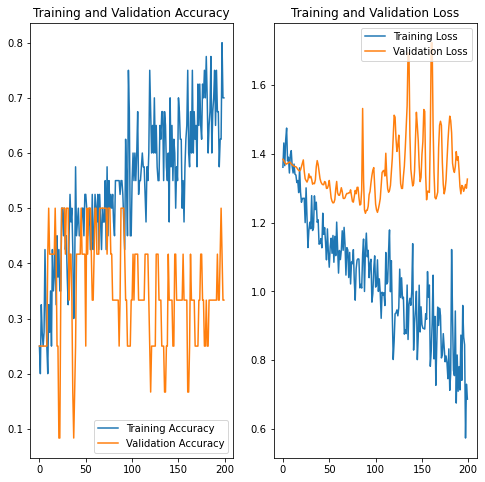

In [58]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
import os
tes = os.listdir('./').sort()

In [60]:
tes

In [61]:
tes

In [62]:
type(train_data)

NameError: name 'train_data' is not defined

In [ ]:
len(train_data.file_paths)